# Usefull code for lab


In [1]:
# !pip install networkx
# !pip install matplotlib
# !pip install tqdm

In [3]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, groupby

### Graph generation


In [3]:
# You can use this function to generate a random graph with 'num_of_nodes' nodes
# and 'completeness' probability of an edge between any two nodes
# If 'directed' is True, the graph will be directed
# If 'draw' is True, the graph will be drawn
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
        
    return G

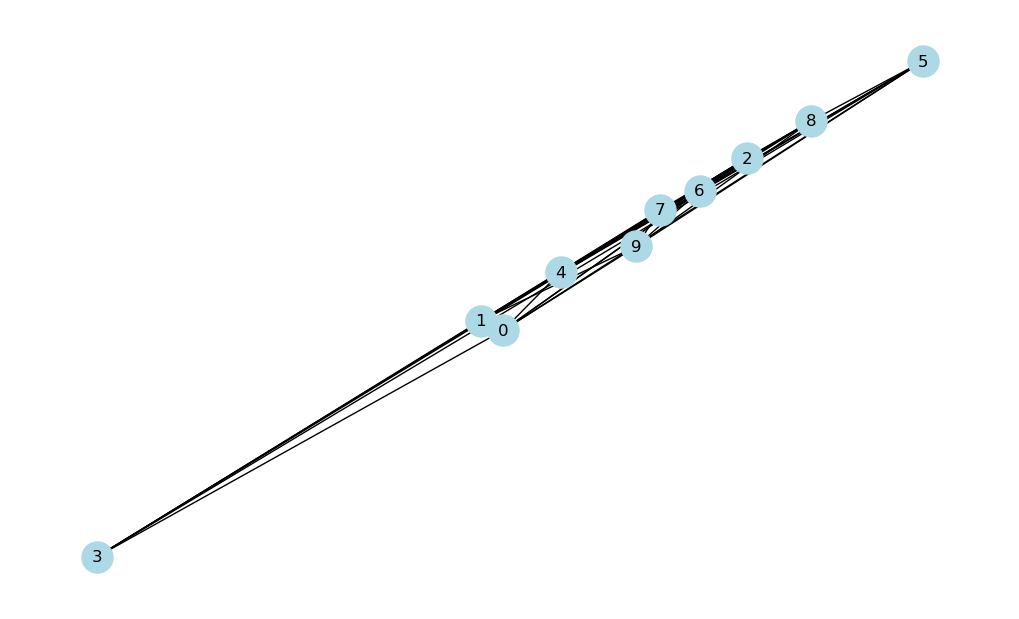

In [64]:
G = gnp_random_connected_graph(10, 0.6, False, True)

# Algorithms of minimal tree


### Prim's algorithm


In [65]:
def prim_algorithm(G, draw: bool = False, start_node: int = 0):
  len_nodes = len(list(G.nodes()))
  visited_nodes = {start_node}
  sorted_edges = sorted(G.edges(data=True), key = lambda x: x[2]['weight'])
  edges = []
  while len(edges)  < len_nodes - 1:
    for edge in sorted_edges:
      if (edge[0] in visited_nodes) ^ (edge[1] in visited_nodes):
        edges.append(edge)
        visited_nodes.update({edge[0], edge[1]})
        break
  new_G = nx.Graph()
  new_G.add_nodes_from(G.nodes())
  for edge in edges:
    new_G.add_edge(edge[0], edge[1], weight=edge[2]['weight'])
  if draw:
    nx.draw(new_G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
  return new_G

cheking of corect working

[(0, 4, {'weight': -3}), (0, 6, {'weight': -1}), (1, 9, {'weight': -2}), (2, 3, {'weight': -2}), (3, 8, {'weight': -3}), (3, 5, {'weight': -4}), (4, 5, {'weight': -1}), (7, 9, {'weight': 1}), (8, 9, {'weight': 0})] 9


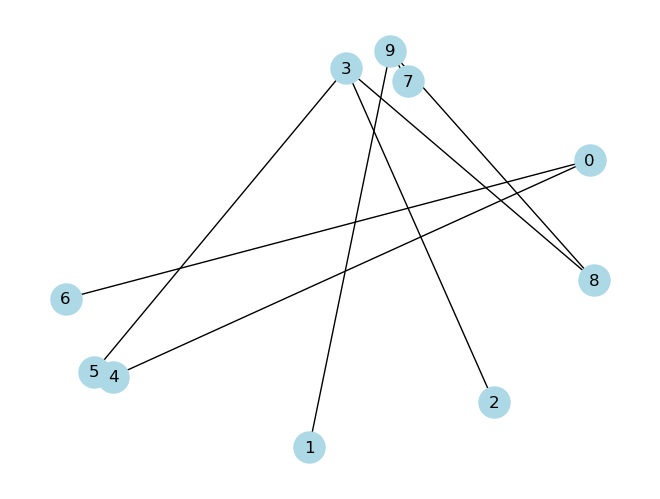

In [66]:
minimal_tree = prim_algorithm(G, True, 1) 
print(minimal_tree.edges(data=True), len(minimal_tree.edges()))

# Comperasion with built-in algorithm

In [7]:
from networkx.algorithms import tree

In [8]:
import time
from tqdm import tqdm

In [10]:
def comparison_prim(nodes: int):
  NUM_OF_ITERATIONS = 1000
  time_taken = 0
  time_taken_built = 0
  for i in tqdm(range(NUM_OF_ITERATIONS)):
      
      # note that we should not measure time of graph creation
      G = gnp_random_connected_graph(nodes, 0.5, False)
      
      start = time.time()
      prim_algorithm(G)
      end = time.time()
      
      time_taken += end - start

      start_built = time.time()
      tree.minimum_spanning_tree(G, algorithm="prim")
      end_built = time.time()

      time_taken_built +=  end_built - start_built
  return(time_taken/NUM_OF_ITERATIONS, time_taken_built/NUM_OF_ITERATIONS)

### Plot of comparison with built-in algorithm


100%|██████████| 1000/1000 [04:22<00:00,  3.80it/s]


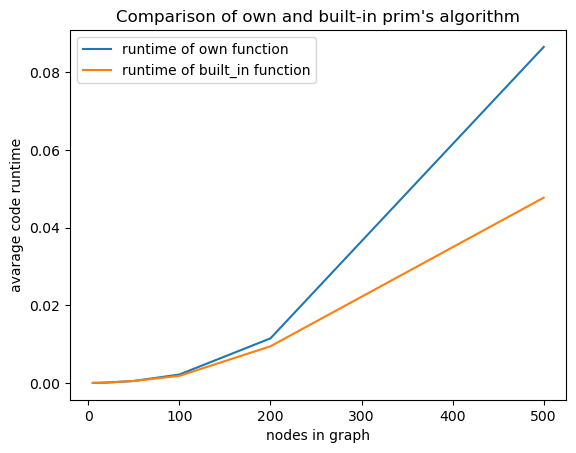

In [11]:
nodes_amount = [5, 10, 20, 50, 100, 200, 500]
own_maked_time = []
built_in_time = []
for nodes in nodes_amount:
  own_func, built_in_func = comparison_prim(nodes)
  own_maked_time.append(own_func)
  built_in_time.append(built_in_func)

plt.plot(nodes_amount, own_maked_time, label ='runtime of own function')
plt.plot(nodes_amount, built_in_time, label ='runtime of built_in function')
plt.xlabel('nodes in graph')
plt.ylabel('avarage code runtime')
plt.title("Comparison of own and built-in prim's algorithm")
plt.legend()